In [1]:
import sys
sys.path.insert(0, '/home/mehdi/github/LSSutils')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_hdf('/home/mehdi/data/templates/dr8pixweight-0.32.0_combined256.h5')
df.replace([-np.inf, np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df.columns

Index(['ebv', 'loghi', 'nstar', 'depth_r_total', 'depth_g_total',
       'depth_z_total', 'fwhm_r_mean', 'fwhm_g_mean', 'fwhm_z_mean',
       'airmass_r_mean', 'airmass_g_mean', 'airmass_z_mean',
       'ccdskymag_r_mean', 'ccdskymag_g_mean', 'ccdskymag_z_mean',
       'exptime_r_total', 'exptime_g_total', 'exptime_z_total', 'mjd_r_min',
       'mjd_g_min', 'mjd_z_min', 'galdepth_g', 'galdepth_r', 'galdepth_z',
       'psfsize_g', 'psfsize_r', 'psfsize_z', 'ebv2', 'stardens'],
      dtype='object')

In [ ]:
from scipy.stats import gaussian_kde
def hist(x, y, **kw):
    
    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)

    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]

    fig, ax = plt.subplots()
    ax.scatter(x, y, c=z, edgecolor='', **kw)
    
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

def density_scatter(x ,y, ax=None, sort=True, bins=20, colorbar=False, **kwargs)   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ), 
                data ,np.vstack([x,y]).T ,method="splinef2d", bounds_error=False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    ax.scatter( x, y, c=z, **kwargs )
    
    if colorbar:        
        norm = Normalize(vmin = np.min(z), vmax = np.max(z))
        cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
        #cbar.ax.set_ylabel('Density')

    return ax

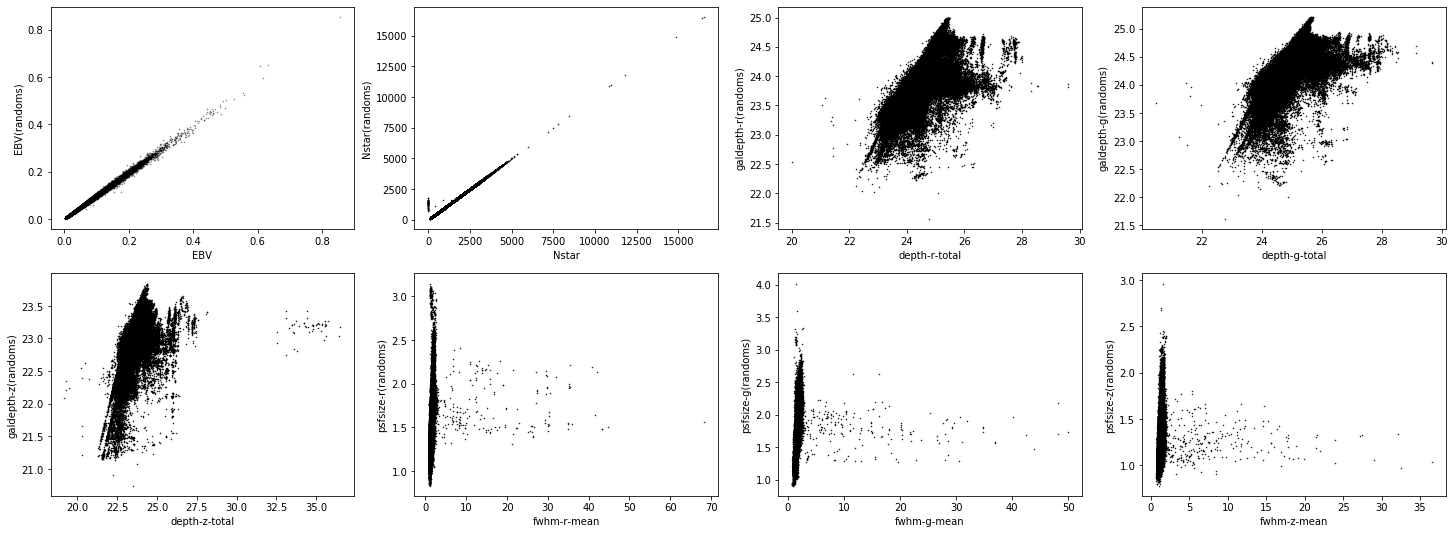

In [14]:
# EBV
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(25, 9))

ax = ax.flatten()

ax[0].scatter(df.ebv, df.ebv2,
            1, marker='.', color='k', alpha=0.5)
ax[0].set(xlabel='EBV', ylabel='EBV(randoms)')


ax[1].scatter(df.nstar, df.stardens,
            1, marker='.', color='k')
ax[1].set(xlabel='Nstar', 
       ylabel='Nstar(randoms)')

i = 2

for band in 'rgz':

    ax[i].scatter(df['depth_%s_total'%band], df['galdepth_%s'%band],
                1, marker='.', color='k')
    ax[i].set(xlabel='depth-%s-total'%band, 
           ylabel='galdepth-%s(randoms)'%band)
    i += 1
    

for band in 'rgz':

    ax[i].scatter(df['fwhm_%s_mean'%band], df['psfsize_%s'%band],
                1, marker='.', color='k')
    ax[i].set(xlabel='fwhm-%s-mean'%band, 
           ylabel='psfsize-%s(randoms)'%band)    
    i += 1